# Customer Segementation Using RFM And K-mean Clustering

### Importing libraries and dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel("Online_Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Performing Preliminary Analysis

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df["CustomerID"]=df["CustomerID"].astype("str")

In [8]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [9]:
df.describe(include="O")

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,4373,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,nan,United Kingdom
freq,1114,2313,2369,135080,495478


In [10]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(536641, 8)

In [12]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [13]:
null_prcnt=round(df.isnull().sum()/len(df)*100,2)
null_prcnt

InvoiceNo      0.00
StockCode      0.00
Description    0.27
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID     0.00
Country        0.00
dtype: float64

In [14]:
df.dropna(how="any",inplace=True)

In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.shape

(535187, 8)

## Cohort Analysis

In [18]:
df["Year-Month"]=df["InvoiceDate"].dt.to_period("M")

In [19]:
df["Year-Month"].nunique()

13

### Total Number of Unique Customers in each Month

In [26]:
Monthly_cohort=df.groupby("Year-Month")["CustomerID"].nunique()#.reset_index(name='Cust_count')

In [21]:
Monthly_cohort

Year-Month
2010-12     949
2011-01     784
2011-02     799
2011-03    1021
2011-04     900
2011-05    1080
2011-06    1052
2011-07     994
2011-08     981
2011-09    1303
2011-10    1426
2011-11    1712
2011-12     687
Freq: M, Name: CustomerID, dtype: int64

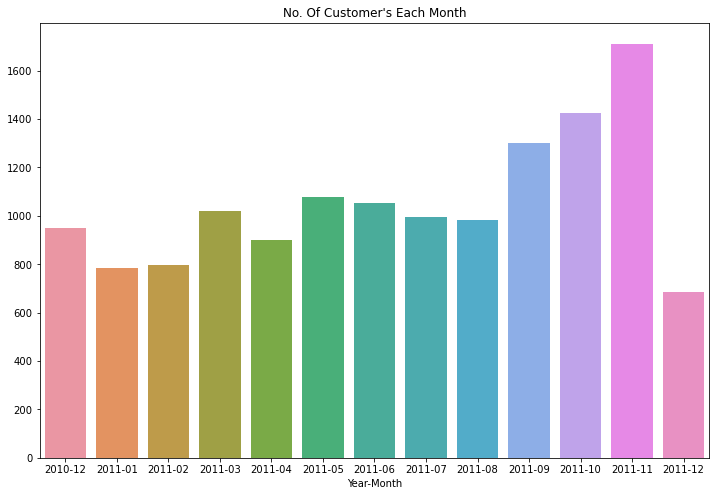

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Monthly_cohort.index,y=Monthly_cohort.values)
plt.title("No. Of Customer's Each Month")
plt.show()

In [23]:
Monthly_rentention=Monthly_cohort-Monthly_cohort.shift(1)
Monthly_rentention

Year-Month
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [24]:
Monthly_rentention_prct=round(Monthly_rentention/Monthly_cohort*100,2)
Monthly_rentention_prct

Year-Month
2010-12       NaN
2011-01    -21.05
2011-02      1.88
2011-03     21.74
2011-04    -13.44
2011-05     16.67
2011-06     -2.66
2011-07     -5.84
2011-08     -1.33
2011-09     24.71
2011-10      8.63
2011-11     16.71
2011-12   -149.20
Freq: M, Name: CustomerID, dtype: float64

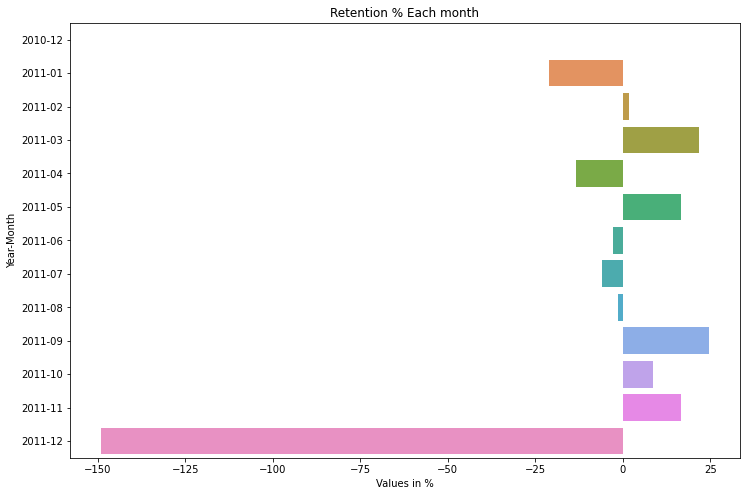

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Monthly_rentention_prct.values,y=Monthly_rentention_prct.index,hue=None)
plt.xlabel("Values in %")
plt.title("Retention % Each month")
plt.show()

## Building RFM Model: Retency, Frequency, Monetary based on Customer behaviour

### Frequency Analysis

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [28]:
df_frequency=df.groupby("CustomerID")["InvoiceNo"].nunique()
frequency=df_frequency.sort_values(ascending=False).reset_index(name="Frequency")

In [29]:
pd.DataFrame(frequency)

,CustomerID,Frequency
0,nan,2256
1,14911.0,248
2,12748.0,224
3,17841.0,169
4,14606.0,128
...,...,...
4368,15428.0,1
4369,14355.0,1
4370,14357.0,1
4371,17030.0,1


### Monetary Value Analysis

In [29]:
df["Amount"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [30]:
Monetary_val=df.groupby("CustomerID")["Amount"].sum()
Monetary_value=Monetary_val.sort_values(ascending=False).reset_index(name="Monetary_Value")


In [31]:
pd.DataFrame(Monetary_value)

,CustomerID,Monetary_Value
0,nan,1447487.53
1,14646.0,279489.02
2,18102.0,256438.49
3,17450.0,187322.17
4,14911.0,132458.73
...,...,...
4368,12503.0,-1126.00
4369,17603.0,-1165.30
4370,14213.0,-1192.20
4371,15369.0,-1592.49


### Retency Analysis

In [32]:
reference_date=df["InvoiceDate"].max() + timedelta(days=1)

In [33]:
df["day_of_last_Purchase"]=(reference_date-df["InvoiceDate"]).dt.days

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Amount,day_of_last_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [35]:
# use min or max as the last purchase day of each CustID is same
reten=df.groupby("CustomerID")["day_of_last_Purchase"].max()    
Retency=reten.sort_values(ascending=False).reset_index(name="Day_of_Last_Purchase")
Retency

,CustomerID,Day_of_Last_Purchase
0,16583.0,374
1,15513.0,374
2,13047.0,374
3,12583.0,374
4,17809.0,374
...,...,...
4368,15471.0,2
4369,15520.0,2
4370,12713.0,1
4371,14569.0,1


### Merging Retency,Frequency and Monetary Dataframes

In [39]:
df_RF=pd.merge(Retency,frequency,how="inner",on="CustomerID")

In [40]:
df_RF.head()

,CustomerID,Day_of_Last_Purchase,Frequency
0,16583.0,374,1
1,15513.0,374,22
2,13047.0,374,18
3,12583.0,374,18
4,17809.0,374,15


In [42]:
df_RFM=pd.merge(df_RF,Monetary_value,how="inner",on="CustomerID")
# df_RFM

In [45]:
df_RFM

,CustomerID,Day_of_Last_Purchase,Frequency,Monetary_Value
0,16583.0,374,1,233.45
1,15513.0,374,22,14520.08
2,13047.0,374,18,3079.10
3,12583.0,374,18,7187.34
4,17809.0,374,15,4627.62
...,...,...,...,...
4368,15471.0,2,1,454.48
4369,15520.0,2,1,343.50
4370,12713.0,1,1,848.55
4371,14569.0,1,1,227.39


In [46]:
df_RFM.columns=["CustomerID","Retency","Frequency","Monetary"]

In [47]:
df_RFM.head()

,CustomerID,Retency,Frequency,Monetary
0,16583.0,374,1,233.45
1,15513.0,374,22,14520.08
2,13047.0,374,18,3079.10
3,12583.0,374,18,7187.34
4,17809.0,374,15,4627.62


In [54]:
df_RFM.describe()

,Retency,Frequency,Monetary
count,4373.000000,4373.000000,4.373000e+03
mean,225.812714,5.590213,2.224104e+03
std,118.419859,35.296119,2.335391e+04
min,1.000000,1.000000,-4.287630e+03
25%,115.000000,1.000000,2.918800e+02
50%,253.000000,3.000000,6.442400e+02
75%,332.000000,5.000000,1.610150e+03
max,374.000000,2256.000000,1.447488e+06


In [49]:
df_RFM["Retency_lable"]=pd.cut(df_RFM["Retency"],bins=4,labels=["active","less-active","old","not-active"])

In [51]:
r_lable=df_RFM["Retency_lable"].value_counts()
r_lable

not-active     1819
active          980
old             977
less-active     597
Name: Retency_lable, dtype: int64

<AxesSubplot:>

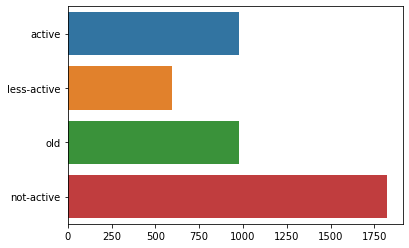

In [52]:
sns.barplot(y=r_lable.index,x=r_lable.values)

In [53]:
df_RFM["freq_lable"]=pd.cut(df_RFM["Frequency"],bins=4,labels=["Top","High","Moderate","Low"])
df_RFM["freq_lable"].value_counts()

Top         4372
Low            1
High           0
Moderate       0
Name: freq_lable, dtype: int64

In [ ]:
sns.barplot(y=r_lable.index,x=r_lable.values)